**Import required modules**

In [1]:
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)
# import the necessary modules
import numpy as np
import tensorflow as tf
import lss_solver as lss
import compare
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

C:\Users\pinak\Documents\GitHub\sphere-fp


**Define the equation through the $\mathcal L_{\log}$ operator**

In [2]:
DTYPE = tf.float32
D = 1.0
dim = 2
ones = np.ones(dim)
domain = [-3. * ones, 3. * ones]
save_folder = '../data/2D-true-vs-learned'

@tf.function
def diff_log_op(f, x, y):
    z = 4.*(x**2 + y**2 - 1.)
    with tf.GradientTape(persistent=True) as tape:
        tape.watch([x, y])
        f_ = f(x, y)
        f_x, f_y = tape.gradient(f_, [x, y])
    f_xx = tape.gradient(f_x, x)
    f_yy = tape.gradient(f_y, y)
    return z*(x*f_x + y*f_y) + 4.*(z+2.) + D*(f_x**2 + f_y**2 + f_xx + f_yy)

**Define the steady state $p_\infty(\mathbf x)$**

In [3]:
from scipy.special import erf
import numpy as np

def p_inf(x, y):
  Z = 0.5 * np.sqrt(np.pi**3 * D) * (1. + erf(1/np.sqrt(D)))
  return tf.exp(-(x**2 + y**2 - 1.)**2 / D) / Z

**Set up experiment parameters and learn the stationary distribution**

In [4]:
learning_rate = tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000, 2000, 10000], [5e-3, 1e-3, 5e-4, 1e-4])
optimizer = tf.keras.optimizers.Adam(learning_rate)
solver = lss.LogSteadyStateSolver(num_nodes=50, num_blocks=3, dtype=DTYPE, name='sphere{}D'.format(dim), diff_log_op=diff_log_op, optimizer=optimizer, domain=domain)
solver.learn(epochs = 50000, n_sample = 1000, save_folder=save_folder, save_along=100, stop_saving=50000)

 Epoch        Loss        Runtime(s)
     013654.666016            3.5433
    10 1664.787598            3.8351
    20  319.459564            4.0997
    30  124.091202            4.3890
    40   63.435795            4.6209
    50   45.944942            4.8812
    60   47.536316            5.1544
    70   37.463352            5.4008
    80   33.954414            5.6447
    90   31.048151            5.9056
   100   27.143940            6.1490
   110   24.902353            6.3962
   120   19.917181            6.6382
   130   21.051399            6.8619
   140   20.833469            7.1017
   150   19.191746            7.3216
   160   19.299200            7.5277
   170   17.902594            7.7447
   180   17.552736            7.9740
   190   16.662987            8.1808
   200   14.978590            8.4086
   210   16.194342            8.6437
   220   15.478539            8.8517
   230   13.724195            9.0649
   240   14.182639            9.2677
   250   12.575118            9.5103
 

  2210    2.206633           61.2166
  2220    2.021256           61.4517
  2230    2.099581           61.6844
  2240    2.109282           61.9150
  2250    2.238704           62.1708
  2260    2.286904           62.4432
  2270    2.369646           62.6956
  2280    1.971804           62.9280
  2290    2.061192           63.1709
  2300    2.282167           63.4123
  2310    2.286472           63.6937
  2320    2.400245           63.9361
  2330    1.798136           64.1960
  2340    1.951373           64.4169
  2350    2.400217           64.6730
  2360    2.201302           64.9343
  2370    1.888254           65.1695
  2380    2.064697           65.4030
  2390    1.671135           65.6303
  2400    2.247073           65.8697
  2410    2.157336           66.1434
  2420    1.782105           66.3807
  2430    2.189480           66.6239
  2440    1.904538           66.8550
  2450    2.033986           67.1099
  2460    2.143792           67.3762
  2470    2.000311           67.6237
 

  4430    0.906283          114.1271
  4440    0.847278          114.3449
  4450    0.740160          114.5711
  4460    0.882840          114.8420
  4470    0.870939          115.0552
  4480    0.785678          115.2629
  4490    0.817878          115.4952
  4500    0.986132          115.7214
  4510    0.802596          115.9619
  4520    0.818246          116.1861
  4530    1.033595          116.4048
  4540    1.032420          116.6404
  4550    0.930045          116.8591
  4560    0.747216          117.1126
  4570    0.805591          117.3575
  4580    0.805006          117.5875
  4590    0.867883          117.8229
  4600    0.762557          118.0545
  4610    0.752868          118.3139
  4620    0.693667          118.5517
  4630    0.888511          118.7770
  4640    0.658437          119.0543
  4650    0.754420          119.3106
  4660    0.754934          119.5508
  4670    0.905139          119.7821
  4680    0.699434          120.0091
  4690    0.730064          120.3072
 

  6650    0.183261          168.7801
  6660    0.174973          169.0275
  6670    0.198104          169.2715
  6680    0.147111          169.5263
  6690    0.190015          169.7502
  6700    0.172772          169.9909
  6710    0.173082          170.2442
  6720    0.190877          170.4617
  6730    0.185005          170.7556
  6740    0.188457          171.0201
  6750    0.149394          171.2994
  6760    0.176329          171.6020
  6770    0.145470          171.8451
  6780    0.164321          172.1487
  6790    0.199719          172.3849
  6800    0.164416          172.6904
  6810    0.160407          172.9705
  6820    0.149962          173.2136
  6830    0.139669          173.4501
  6840    0.158808          173.6716
  6850    0.151720          173.9264
  6860    0.159566          174.1700
  6870    0.151536          174.4156
  6880    0.169303          174.6730
  6890    0.161077          174.9303
  6900    0.156029          175.1830
  6910    0.157600          175.4394
 

  8870    0.076934          226.1480
  8880    0.166929          226.3669
  8890    0.086039          226.5888
  8900    0.072811          226.8225
  8910    0.085780          227.0691
  8920    0.068711          227.2914
  8930    0.073401          227.5284
  8940    0.073894          227.7630
  8950    0.078547          228.0243
  8960    0.070508          228.2665
  8970    0.076949          228.5136
  8980    0.076978          228.7827
  8990    0.064104          229.0207
  9000    0.064240          229.2596
  9010    0.465834          229.5256
  9020    0.181038          229.7679
  9030    0.110393          229.9995
  9040    0.077091          230.2063
  9050    0.079742          230.4422
  9060    0.068236          230.6692
  9070    0.074105          230.8931
  9080    0.066374          231.1643
  9090    0.076402          231.3777
  9100    0.083961          231.6084
  9110    0.146934          231.8988
  9120    0.085919          232.1407
  9130    0.066599          232.4175
 

 11090    0.058826          287.9715
 11100    0.047212          288.2568
 11110    0.050487          288.5014
 11120    0.058632          288.7629
 11130    0.054954          288.9970
 11140    0.056914          289.2128
 11150    0.051017          289.4872
 11160    0.056141          289.7202
 11170    0.050829          289.9680
 11180    0.051735          290.2277
 11190    0.050558          290.4422
 11200    0.049945          290.7459
 11210    0.049887          290.9964
 11220    0.049802          291.2785
 11230    0.057678          291.5478
 11240    0.048898          291.7702
 11250    0.054617          292.0800
 11260    0.057617          292.3065
 11270    0.057278          292.5443
 11280    0.056615          292.8586
 11290    0.050702          293.0739
 11300    0.054906          293.3231
 11310    0.055603          293.6155
 11320    0.049042          293.8420
 11330    0.056634          294.1065
 11340    0.052522          294.3437
 11350    0.056471          294.6001
 

 13310    0.042990          350.3423
 13320    0.042550          350.5896
 13330    0.045581          350.8273
 13340    0.042819          351.0649
 13350    0.045688          351.2985
 13360    0.041676          351.5629
 13370    0.044936          351.7711
 13380    0.043053          352.0348
 13390    0.038566          352.3203
 13400    0.049937          352.5635
 13410    0.044736          352.8553
 13420    0.044044          353.0995
 13430    0.045848          353.3688
 13440    0.042643          353.6534
 13450    0.038818          353.8886
 13460    0.046439          354.1781
 13470    0.038623          354.4300
 13480    0.044565          354.7343
 13490    0.044603          355.0291
 13500    0.046483          355.3347
 13510    0.039875          355.6195
 13520    0.043869          355.9103
 13530    0.036230          356.1692
 13540    0.043082          356.4199
 13550    0.046580          356.7111
 13560    0.040860          356.9393
 13570    0.046192          357.2012
 

 15530    0.040755          413.0115
 15540    0.038270          413.2939
 15550    0.035417          413.5368
 15560    0.040258          413.7682
 15570    0.038777          414.0156
 15580    0.036960          414.2668
 15590    0.035766          414.5042
 15600    0.035335          414.7289
 15610    0.038358          415.0073
 15620    0.036316          415.2513
 15630    0.039182          415.5193
 15640    0.033759          415.7604
 15650    0.046864          416.0331
 15660    0.041267          416.2851
 15670    0.036207          416.5661
 15680    0.033127          416.7907
 15690    0.035917          417.0396
 15700    0.033964          417.2634
 15710    0.035511          417.5286
 15720    0.037410          417.7628
 15730    0.034058          418.0244
 15740    0.034418          418.2697
 15750    0.037483          418.5037
 15760    0.033204          418.7425
 15770    0.035351          418.9742
 15780    0.035283          419.2153
 15790    0.033702          419.4595
 

 17760    0.031920          467.4811
 17770    0.031074          467.7338
 17780    0.026213          467.9991
 17790    0.029873          468.2531
 17800    0.031745          468.4950
 17810    0.031120          468.7574
 17820    0.026234          468.9919
 17830    0.030882          469.2281
 17840    0.030755          469.4624
 17850    0.029372          469.7150
 17860    0.032640          469.9532
 17870    0.029692          470.1724
 17880    0.033439          470.3867
 17890    0.029219          470.6064
 17900    0.029100          470.8265
 17910    0.028486          471.1055
 17920    0.030628          471.3410
 17930    0.029522          471.5751
 17940    0.033456          471.8427
 17950    0.027970          472.1243
 17960    0.028792          472.3686
 17970    0.032443          472.6244
 17980    0.028766          472.8733
 17990    0.034192          473.1445
 18000    0.027830          473.4066
 18010    0.027787          473.7333
 18020    0.030261          473.9839
 

 19980    0.026404          521.7741
 19990    0.027869          522.0179
 20000    0.026009          522.2328
 20010    0.024584          522.4861
 20020    0.026125          522.7251
 20030    0.025083          522.9494
 20040    0.026077          523.1684
 20050    0.024495          523.4075
 20060    0.027504          523.6207
 20070    0.025794          523.8388
 20080    0.027047          524.0847
 20090    0.025116          524.3171
 20100    0.023712          524.5366
 20110    0.022221          524.8053
 20120    0.024085          525.0360
 20130    0.026589          525.3024
 20140    0.021976          525.5225
 20150    0.023523          525.7609
 20160    0.023499          525.9938
 20170    0.025478          526.2098
 20180    0.025488          526.4415
 20190    0.022412          526.7110
 20200    0.024859          526.9382
 20210    0.024770          527.2402
 20220    0.029664          527.4646
 20230    0.022611          527.7413
 20240    0.022916          527.9859
 

 22200    0.024223          575.5696
 22210    0.024664          575.8068
 22220    0.019939          576.0706
 22230    0.021550          576.3415
 22240    0.020574          576.5642
 22250    0.021462          576.8009
 22260    0.022301          577.0357
 22270    0.023464          577.3121
 22280    0.019439          577.5589
 22290    0.022136          577.7765
 22300    0.020377          577.9990
 22310    0.023633          578.2692
 22320    0.022443          578.5255
 22330    0.024879          578.7691
 22340    0.022065          578.9804
 22350    0.021170          579.1903
 22360    0.024258          579.4305
 22370    0.020021          579.6451
 22380    0.020712          579.8834
 22390    0.021727          580.1322
 22400    0.021901          580.3471
 22410    0.022745          580.5844
 22420    0.022381          580.8101
 22430    0.020836          581.0194
 22440    0.021165          581.2374
 22450    0.019119          581.4695
 22460    0.021672          581.6839
 

 24420    0.018958          628.5997
 24430    0.018357          628.8473
 24440    0.019807          629.0954
 24450    0.019195          629.3491
 24460    0.020128          629.5677
 24470    0.019725          629.7991
 24480    0.018613          630.0379
 24490    0.019680          630.2595
 24500    0.019017          630.4692
 24510    0.016915          630.7139
 24520    0.019395          630.9655
 24530    0.019274          631.1800
 24540    0.019532          631.4369
 24550    0.018021          631.6911
 24560    0.018409          631.9268
 24570    0.020085          632.1742
 24580    0.017754          632.3912
 24590    0.017121          632.6203
 24600    0.019023          632.8567
 24610    0.018251          633.1126
 24620    0.020617          633.3565
 24630    0.020322          633.6232
 24640    0.020990          633.8634
 24650    0.018061          634.1272
 24660    0.018414          634.3703
 24670    0.016762          634.5952
 24680    0.020916          634.8415
 

 26640    0.015537          683.3637
 26650    0.016781          683.6135
 26660    0.017793          683.8449
 26670    0.015961          684.1056
 26680    0.015027          684.3308
 26690    0.018094          684.5807
 26700    0.019486          684.8395
 26710    0.015565          685.1088
 26720    0.016633          685.3750
 26730    0.014908          685.6413
 26740    0.018934          685.8919
 26750    0.018641          686.1528
 26760    0.018677          686.3819
 26770    0.015035          686.6638
 26780    0.017172          686.9495
 26790    0.016335          687.2033
 26800    0.017873          687.4325
 26810    0.015995          687.6997
 26820    0.016027          687.9545
 26830    0.016340          688.1982
 26840    0.016964          688.4447
 26850    0.017067          688.6837
 26860    0.017523          688.9468
 26870    0.015709          689.2679
 26880    0.014892          689.5393
 26890    0.017985          689.8031
 26900    0.016257          690.0472
 

 28860    0.016625          741.7424
 28870    0.015360          741.9730
 28880    0.014373          742.2059
 28890    0.015550          742.4354
 28900    0.015103          742.6622
 28910    0.028608          742.9046
 28920    0.016990          743.1592
 28930    0.017721          743.3815
 28940    0.014812          743.6572
 28950    0.014275          743.8762
 28960    0.013165          744.1001
 28970    0.016102          744.3693
 28980    0.015286          744.6184
 28990    0.013551          744.8401
 29000    0.015291          745.1059
 29010    0.015134          745.3657
 29020    0.014409          745.6207
 29030    0.013267          745.8443
 29040    0.012969          746.0784
 29050    0.013734          746.3244
 29060    0.014183          746.5623
 29070    0.015188          746.7938
 29080    0.014225          747.0163
 29090    0.015857          747.2306
 29100    0.017274          747.4489
 29110    0.013872          747.7102
 29120    0.014032          747.9352
 

 31080    0.012754          800.9129
 31090    0.014184          801.2297
 31100    0.014685          801.5550
 31110    0.014422          801.8709
 31120    0.013071          802.1805
 31130    0.012958          802.4916
 31140    0.022150          802.7907
 31150    0.014715          803.1112
 31160    0.013643          803.4176
 31170    0.013141          803.7548
 31180    0.013136          804.0589
 31190    0.014521          804.3709
 31200    0.012554          804.7067
 31210    0.013308          805.0428
 31220    0.014097          805.3711
 31230    0.012946          805.6764
 31240    0.012378          805.9857
 31250    0.014865          806.2985
 31260    0.014848          806.6077
 31270    0.012541          806.9301
 31280    0.013689          807.2451
 31290    0.014017          807.5826
 31300    0.012984          807.8555
 31310    0.013383          808.1715
 31320    0.013791          808.4749
 31330    0.014139          808.7600
 31340    0.013826          809.0817
 

 33300    0.012432          870.0048
 33310    0.012617          870.3318
 33320    0.012002          870.6395
 33330    0.012529          870.9678
 33340    0.012392          871.3046
 33350    0.011292          871.5831
 33360    0.012292          871.8787
 33370    0.011445          872.1813
 33380    0.012691          872.5102
 33390    0.012726          872.7833
 33400    0.012459          873.0802
 33410    0.011515          873.4080
 33420    0.013057          873.7130
 33430    0.013879          874.0185
 33440    0.019962          874.3010
 33450    0.012978          874.6452
 33460    0.012852          874.9876
 33470    0.012561          875.2803
 33480    0.012474          875.5810
 33490    0.012333          875.8834
 33500    0.012912          876.1795
 33510    0.011904          876.5297
 33520    0.011539          876.8312
 33530    0.012864          877.1327
 33540    0.012139          877.4254
 33550    0.011809          877.7529
 33560    0.011805          878.0734
 

 35520    0.012563          939.0227
 35530    0.011299          939.3593
 35540    0.011333          939.6586
 35550    0.012153          940.0081
 35560    0.011613          940.3229
 35570    0.011844          940.6770
 35580    0.010830          940.9682
 35590    0.017839          941.2827
 35600    0.012817          941.5738
 35610    0.012219          941.9348
 35620    0.011187          942.2093
 35630    0.012273          942.5299
 35640    0.010832          942.8215
 35650    0.009672          943.1353
 35660    0.012340          943.4213
 35670    0.012138          943.7376
 35680    0.012927          944.0844
 35690    0.011717          944.3735
 35700    0.011401          944.6876
 35710    0.010990          945.0191
 35720    0.011367          945.3334
 35730    0.010263          945.6307
 35740    0.011022          945.9457
 35750    0.011247          946.2525
 35760    0.011072          946.5780
 35770    0.010965          946.8666
 35780    0.011636          947.1993
 

 37740    0.010851         1009.2001
 37750    0.009608         1009.4850
 37760    0.010794         1009.8023
 37770    0.010506         1010.1002
 37780    0.010068         1010.4000
 37790    0.010226         1010.7277
 37800    0.010634         1011.0105
 37810    0.009512         1011.3862
 37820    0.010238         1011.6960
 37830    0.009779         1012.0057
 37840    0.011574         1012.3247
 37850    0.009787         1012.6471
 37860    0.010447         1012.9479
 37870    0.009794         1013.2412
 37880    0.010529         1013.5545
 37890    0.010218         1013.8819
 37900    0.010293         1014.1689
 37910    0.010142         1014.5023
 37920    0.010366         1014.8225
 37930    0.010304         1015.1232
 37940    0.010567         1015.4406
 37950    0.010729         1015.7247
 37960    0.011004         1016.0443
 37970    0.010406         1016.3238
 37980    0.010506         1016.6511
 37990    0.010900         1016.9485
 38000    0.010115         1017.2796
 

 39960    0.010324         1079.5085
 39970    0.009885         1079.8073
 39980    0.010813         1080.1615
 39990    0.010181         1080.4681
 40000    0.010610         1080.8147
 40010    0.010631         1081.1591
 40020    0.010727         1081.5279
 40030    0.009718         1081.8183
 40040    0.010122         1082.1681
 40050    0.010460         1082.4639
 40060    0.008832         1082.7962
 40070    0.009717         1083.0792
 40080    0.010073         1083.3909
 40090    0.009397         1083.6792
 40100    0.009183         1084.0232
 40110    0.009866         1084.3472
 40120    0.009300         1084.6499
 40130    0.009312         1084.9532
 40140    0.009398         1085.2772
 40150    0.011706         1085.5791
 40160    0.009796         1085.9612
 40170    0.008918         1086.2772
 40180    0.009697         1086.5742
 40190    0.009240         1086.8612
 40200    0.009295         1087.1752
 40210    0.009737         1087.5114
 40220    0.010881         1087.8524
 

 42180    0.008956         1149.9878
 42190    0.007841         1150.2741
 42200    0.008801         1150.5585
 42210    0.008691         1150.9204
 42220    0.009333         1151.2753
 42230    0.008786         1151.5632
 42240    0.009490         1151.8847
 42250    0.009283         1152.1824
 42260    0.009050         1152.5059
 42270    0.010164         1152.8136
 42280    0.009609         1153.1369
 42290    0.009088         1153.4474
 42300    0.008646         1153.7901
 42310    0.009340         1154.1286
 42320    0.008741         1154.4287
 42330    0.009065         1154.6994
 42340    0.008260         1155.0449
 42350    0.007909         1155.3395
 42360    0.009407         1155.6670
 42370    0.009735         1155.9638
 42380    0.009177         1156.2810
 42390    0.009964         1156.5992
 42400    0.009291         1156.9692
 42410    0.009571         1157.3019
 42420    0.008557         1157.6029
 42430    0.009391         1157.8820
 42440    0.009357         1158.1472
 

 44400    0.008222         1220.1244
 44410    0.008631         1220.4812
 44420    0.008630         1220.7806
 44430    0.008762         1221.1326
 44440    0.008740         1221.4290
 44450    0.007249         1221.7659
 44460    0.008394         1222.0619
 44470    0.007970         1222.3482
 44480    0.008410         1222.6537
 44490    0.007652         1222.9579
 44500    0.008494         1223.2527
 44510    0.008008         1223.6346
 44520    0.009178         1223.9440
 44530    0.007946         1224.2449
 44540    0.007905         1224.5799
 44550    0.007957         1224.8805
 44560    0.008195         1225.2234
 44570    0.008509         1225.5207
 44580    0.007707         1225.8334
 44590    0.008558         1226.1124
 44600    0.008855         1226.4438
 44610    0.008717         1226.7792
 44620    0.008246         1227.0996
 44630    0.008911         1227.4158
 44640    0.008938         1227.7502
 44650    0.008957         1228.0428
 44660    0.008810         1228.3853
 

 46620    0.007863         1290.2438
 46630    0.007925         1290.5811
 46640    0.007478         1290.8975
 46650    0.008183         1291.2071
 46660    0.007816         1291.5229
 46670    0.006918         1291.8217
 46680    0.008389         1292.1457
 46690    0.008506         1292.4546
 46700    0.007861         1292.7658
 46710    0.008952         1293.1102
 46720    0.008468         1293.4416
 46730    0.008321         1293.7512
 46740    0.008163         1294.0607
 46750    0.011669         1294.3844
 46760    0.010910         1294.7148
 46770    0.008201         1295.0337
 46780    0.008633         1295.3158
 46790    0.007677         1295.6047
 46800    0.007752         1295.8774
 46810    0.008200         1296.2230
 46820    0.007340         1296.5305
 46830    0.008789         1296.8514
 46840    0.008814         1297.1459
 46850    0.007083         1297.4649
 46860    0.007704         1297.8004
 46870    0.008032         1298.1087
 46880    0.007467         1298.3917
 

 48840    0.006880         1359.5603
 48850    0.007711         1359.8613
 48860    0.007460         1360.1405
 48870    0.007348         1360.4600
 48880    0.007920         1360.7555
 48890    0.007333         1361.0647
 48900    0.006636         1361.3644
 48910    0.007279         1361.6775
 48920    0.007979         1361.9919
 48930    0.007304         1362.2684
 48940    0.007317         1362.5788
 48950    0.007158         1362.8969
 48960    0.008105         1363.2085
 48970    0.007685         1363.5149
 48980    0.007714         1363.8394
 48990    0.008059         1364.1298
 49000    0.006690         1364.4359
 49010    0.007675         1364.7650
 49020    0.006669         1365.0664
 49030    0.007716         1365.3758
 49040    0.007738         1365.6984
 49050    0.008036         1365.9861
 49060    0.007393         1366.2763
 49070    0.007574         1366.5710
 49080    0.007439         1366.8711
 49090    0.007781         1367.1774
 49100    0.007579         1367.4752
 

**Visualize the learned distribution**

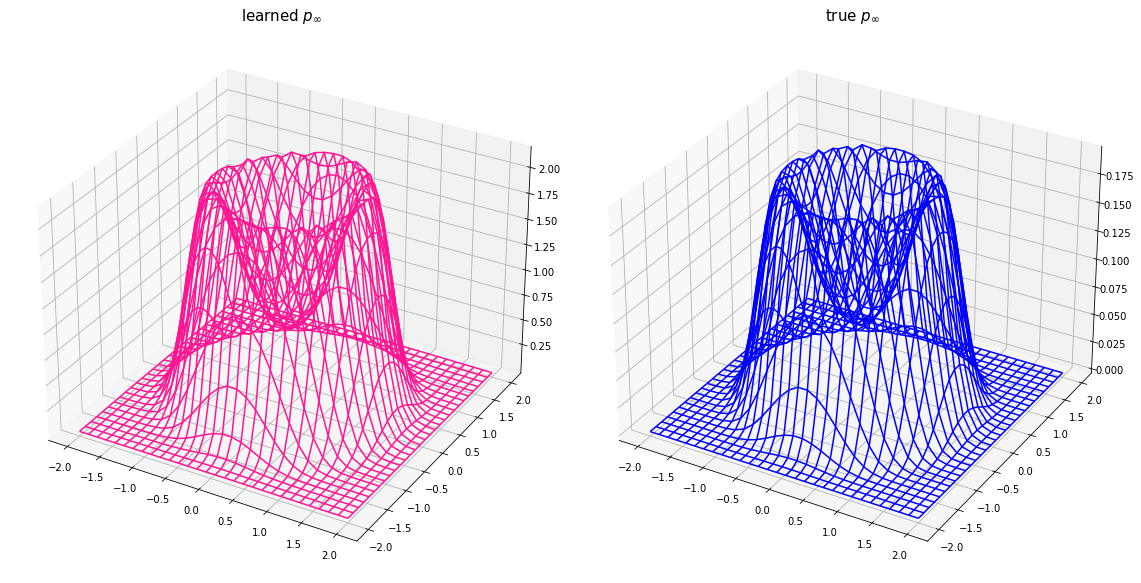

In [5]:
import matplotlib.pyplot as plt

def plot_solutions(learned, true, resolution=30, low=[-2., -2], high=[2., 2.]):
  fig = plt.figure(figsize=(16, 8))
  ax_l = fig.add_subplot(121, projection='3d')
  ax_t = fig.add_subplot(122, projection='3d')
  x = np.linspace(low[0], high[0], num=resolution, endpoint=True)
  y = np.linspace(low[1], high[1], num=resolution, endpoint=True)
  y = np.repeat(y, resolution, axis=0).reshape((-1, 1))
  x = np.array(list(x) * resolution).reshape((-1, 1))
  z_l = learned(x, y).numpy()
  z_t = true(x, y).numpy()
  grid = (resolution, resolution)
  x = x.reshape(grid)
  y = y.reshape(grid)
  z_l = z_l.reshape(grid)
  z_t = z_t.reshape(grid)
  ax_l.plot_wireframe(x, y, z_l, color='deeppink')
  ax_l.set_title('learned $p_\infty$', fontsize=15)
  ax_t.plot_wireframe(x, y, z_t, color='blue')
  ax_t.set_title('true $p_\infty$', fontsize=15)
  plt.tight_layout()
  plt.show()
  

plot_solutions(learned=lambda *args: tf.exp(solver.net(*args)), true=p_inf)

**Visulaize the noramlized learned solution**

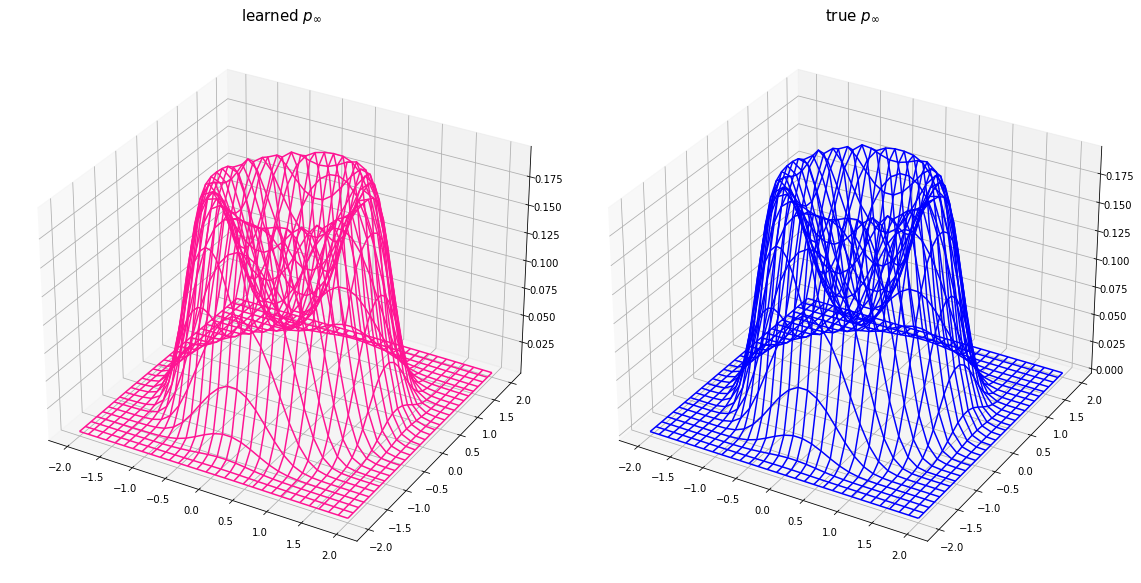

In [6]:
x, y = solver.sampler(n_sample=100000, domain=[-3. * ones, 3. * ones])
Z_mc = 6**2 * tf.reduce_mean(tf.exp(solver.net(x, y))).numpy()
plot_solutions(learned=lambda *args: tf.exp(solver.net(*args)) / Z_mc, true=p_inf)

**Investigate the size of $θ$**

In [7]:
solver.net.summary()

Model: "sphere2D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTMForgetBlock (LSTMForget  multiple                 1000      
 Block)                                                          
                                                                 
 LSTMForgetBlock (LSTMForget  multiple                 10600     
 Block)                                                          
                                                                 
 LSTMForgetBlock (LSTMForget  multiple                 10600     
 Block)                                                          
                                                                 
 dense (Dense)               multiple                  51        
                                                                 
 batch_normalization (BatchN  multiple                 0 (unused)
 ormalization)                                            